# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

# Projeto: Treine um Quadrotor Como Voar

Projete um agente para pilotar um quadcopter e depois treine-o usando um algoritmo de aprendizado de reforço de sua escolha!

Tente aplicar as técnicas que você aprendeu, mas sinta-se à vontade para inventar idéias inovadoras e testá-las.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

## Instructions

Dê uma olhada nos arquivos no diretório para entender melhor a estrutura do projeto.

- `task.py`: Defina sua tarefa (ambiente) neste arquivo.
- `agents /`: Pasta contendo agentes de aprendizado de reforço.
    - `policy_search.py`: Um agente de amostra foi fornecido aqui.
    - `agent.py`: Desenvolva seu agente aqui.
- `physics_sim.py`: Este arquivo contém o simulador para o quadcopter. ** NÃO MODIFICAR ESTE ARQUIVO **.

Para este projeto, você irá definir sua própria tarefa em `task.py`. Embora tenhamos fornecido uma tarefa de exemplo para você começar, é recomendável alterá-la. Posteriormente neste caderno, você aprenderá mais sobre como corrigir este arquivo.

Você também projetará um agente de aprendizado de reforço em `agent.py` para concluir sua tarefa escolhida.

Você está convidado a criar arquivos adicionais para ajudá-lo a organizar seu código. Por exemplo, você pode achar útil definir um arquivo `model.py` definindo quaisquer arquiteturas de rede neural necessárias.

## Controlando o Quadcopter

Fornecemos um agente de amostra na célula de código abaixo para mostrar como usar o sim para controlar o quadcopter. Este agente é ainda mais simples que o agente de amostra que você examinará (em `agents / policy_search.py`) mais adiante neste caderno!

O agente controla o quadcopter definindo as revoluções por segundo em cada um dos seus quatro rotores. O agente fornecido na classe Basic_Agent abaixo sempre seleciona uma ação aleatória para cada um dos quatro rotores. Essas quatro velocidades são retornadas pelo método `act` como uma lista de quatro números de ponto flutuante.

Para este projeto, o agente que você implementará em `agents / agent.py` terá um método muito mais inteligente para selecionar ações!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

Execute a célula de código abaixo para que o agente selecione ações para controlar o quadcopter.

Sinta-se à vontade para alterar os valores fornecidos de `runtime`,` init_pose`, `init_velocities` e` init_angle_velocities` abaixo para alterar as condições iniciais do quadcopter.

A lista `labels` abaixo anota as estatísticas que são salvas durante a execução da simulação. Todas essas informações são salvas em um arquivo de texto `data.txt` e armazenadas no dicionário` results`.

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])   # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([10., 10., 10.])           # target
file_output = 'data.txt'                         # file name for saved results


# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

Execute a célula de código abaixo para visualizar como a posição do quadcopter evoluiu durante a simulação.

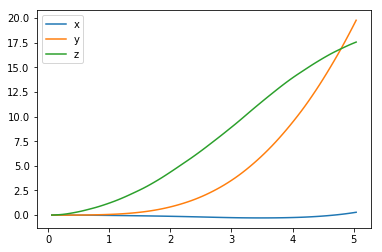

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

A próxima célula de código visualiza a velocidade do quadcopter.

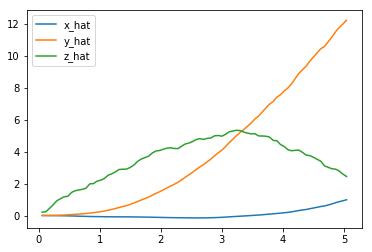

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

Em seguida, você pode plotar os ângulos de Euler (a rotação do quadcopter sobre os $ x $ -, $ y $ - e $ z $ -axes),

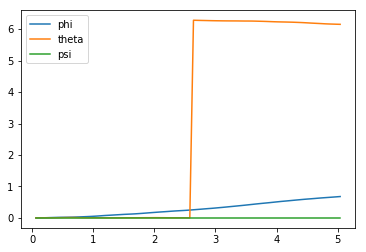

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

antes de traçar as velocidades (em radianos por segundo) correspondentes a cada um dos ângulos de Euler.

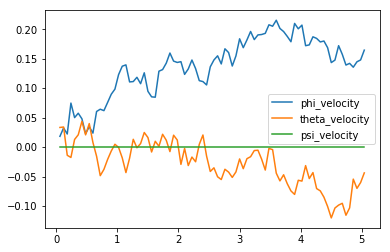

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

Finalmente, você pode usar a célula de código abaixo para imprimir a escolha de ações do agente.

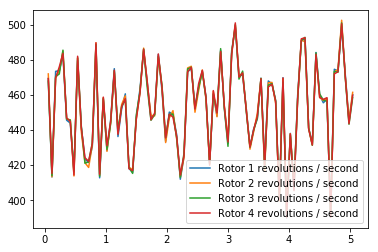

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

Ao especificar uma tarefa, você obterá o estado do ambiente no simulador. Execute a célula de código abaixo para imprimir os valores das seguintes variáveis no final da simulação:
- `task.sim.pose` (a posição do quadcopter nas dimensões ($ x, y, z $) e os ângulos de Euler),
- `task.sim.v` (a velocidade do quadcopter nas dimensões ($ x, y, z $)), e
- `task.sim.angular_v` (radianos / segundo para cada um dos três ângulos de Euler).


In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
# a pose, a velocidade e a velocidade angular do quadricóptero no final do episódio

print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  0.28926664  19.78497269  17.56858014   0.67939675   6.15163514   0.        ]
[  0.98476317  12.20409888   2.43756082]
[ 0.16443002 -0.04369532  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

Na tarefa de amostra em `task.py`, usamos a pose de 6 dimensões do quadcopter para construir o estado do ambiente em cada timestep. No entanto, ao alterar a tarefa para seus propósitos, você pode expandir o tamanho do vetor de estado incluindo as informações de velocidade. Você pode usar qualquer combinação de pose, velocidade e velocidade angular - sinta-se livre para mexer aqui e construir o estado para se adequar à sua tarefa.

## A tarefa

Uma tarefa de amostra foi fornecida para você em `task.py`. Abra este arquivo em uma nova janela agora.

O método `__init __ ()` é usado para inicializar diversas variáveis ​​necessárias para especificar a tarefa.
- O simulador é inicializado como uma instância da classe `PhysicsSim` (de` physics_sim.py`).
- Inspirado na metodologia do artigo original do DDPG, utilizamos repetições de ações. Para cada timestep do agente, nós aumentamos o tempo de ação da simulação `action_repeats`. Se você não estiver familiarizado com as ações repetidas, leia a seção ** Resultados ** no [documento DDPG] (https://arxiv.org/abs/1509.02971).
- Nós definimos o número de elementos no vetor de estado. Para a tarefa de amostra, trabalhamos apenas com as informações de pose de 6 dimensões. Para definir o tamanho do estado (`state_size`), devemos levar em conta as ações repetidas.
- O ambiente terá sempre um espaço de ação de 4 dimensões, com uma entrada para cada rotor (`action_size = 4`). Você pode definir os valores mínimo (`action_low`) e máximo (` action_high`) de cada entrada aqui.
- A tarefa de amostra nesse arquivo fornecido é para o agente atingir uma posição de destino. Nós especificamos essa posição de destino como uma variável.

O método `reset ()` redefine o simulador. O agente deve chamar esse método toda vez que o episódio terminar. Você pode ver um exemplo disso na célula de código abaixo.

O método `step ()` é talvez o mais importante. Ele aceita a ação do agente `rotor_speeds`, que é usada para preparar o próximo estado a ser transmitido ao agente. Então, a recompensa é calculada a partir de `get_reward ()`. O episódio é considerado feito se o limite de tempo foi excedido, ou o quadcopter viajou para fora dos limites da simulação.

Na próxima seção, você aprenderá a testar o desempenho de um agente nessa tarefa.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

## O agente

O agente de amostra fornecido em `agents / policy_search.py` usa uma política linear muito simplista para calcular diretamente o vetor de ação como um produto de ponto do vetor de estado e uma matriz de pesos. Então, ele perturba aleatoriamente os parâmetros adicionando algum ruído gaussiano, para produzir uma política diferente. Com base na recompensa média obtida em cada episódio (pontuação), ele acompanha o melhor conjunto de parâmetros encontrados até o momento, como a pontuação está mudando e, consequentemente, ajusta um fator de escala para ampliar ou aumentar o ruído.

Execute a célula de código abaixo para ver como o agente executa na tarefa de amostra.

In [11]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.097 (best =   0.077), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

Este agente deve executar muito mal nesta tarefa. E é aí que você entra!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Defina a tarefa, projete o agente e treine seu agente!

Emendar `task.py` para especificar uma tarefa de sua escolha. Se você não tiver certeza do tipo de tarefa a ser especificada, talvez queira ensinar seu quadricóptero a decolar, pairar no lugar, aterrissar suavemente ou alcançar uma pose de alvo.

Depois de especificar sua tarefa, use o agente de amostra em `agents / policy_search.py` como um modelo para definir seu próprio agente em` agents / agent.py`. Você pode pegar emprestado o que precisar do agente de amostra, incluindo idéias sobre como modularizar seu código (usando métodos auxiliares como `act ()`, `learn ()`, `reset_episode ()`, etc.).

Observe que é altamente improvável ** que o primeiro agente e a tarefa que você especificar aprendam bem. Você provavelmente terá que ajustar vários hiperparâmetros e a função de recompensa para sua tarefa até chegar a um comportamento razoavelmente bom.

Ao desenvolver seu agente, é importante ficar de olho no desempenho. Use o código acima como inspiração para criar um mecanismo para registrar / salvar as recompensas totais obtidas em cada episódio para arquivo. Se as recompensas do episódio estão aumentando gradualmente, isso é uma indicação de que seu agente está aprendendo.

In [12]:
%load_ext autoreload
%autoreload 2
## TODO: Train your agent here.
import csv
import numpy as np
import sys
import pandas as pd
from agents.agent import DDPG
from task import *
#from task import Task_quadricopter

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])   # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([10., 10., 10.])           # target
file_output = 'data.txt'                         # file name for saved results
num_episodes = 2000                              # number of episodes

task = Task_quadricopter(init_pose=init_pose, init_velocities=init_velocities, init_angle_velocities=init_angle_velocities, runtime=runtime, target_pos=target_pos)
#task = Task(init_pose=init_pose, init_velocities=init_velocities, init_angle_velocities=init_angle_velocities, runtime=runtime, target_pos=target_pos)
#task = Task(init_pose=init_pose, target_pos=target_pos)

agent = DDPG(task)

done = False
labels = ['episode','time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4','rewards']

results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode_vars() # start a new episode
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            to_write = [i_episode] + [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action) + list([reward])
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            state = next_state
            if done:
                print("\rEpisode = {:4d}, score = {:7.3f} (best score= {:7.3f})".format(
                    i_episode, agent.score, agent.best_score), end="")  # [debug]
                break
        sys.stdout.flush()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode = 2000, score =  31.049 (best score= 167.895)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

## Traçar as recompensas

Quando estiver satisfeito com o seu desempenho, trace as recompensas do episódio, seja a partir de uma única corrida, ou calculando a média de várias execuções.

A célula de código abaixo visualiza como a posição do quadricoptero evoluiu durante a simulação.

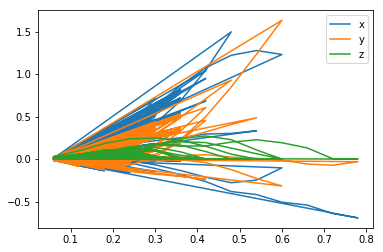

In [19]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

A célula seguinte visualiza como os ângulos de Euler (a posição do quadcopter sobre os $ x $ -, $ y $ - e $ z $ -axes) variam ao longo do tempo.

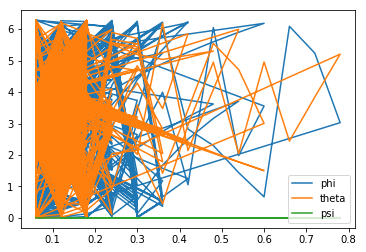

In [20]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

Em seguida visualizamos as velocidades nas direções x, y e z.

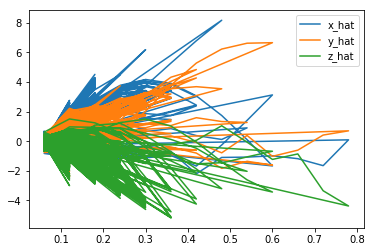

In [21]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

A célula abaixo mostra como as velocidades (em radianos por segundo) correspondentes a cada um dos ângulos de Euler evolui durante a simulação.

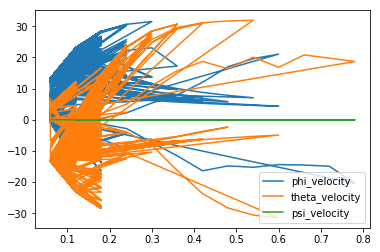

In [22]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

A célula de código seguinte mostra como a escolha de ações do agente (as velocidades am cada um dos rotores) mudam com o tempo.

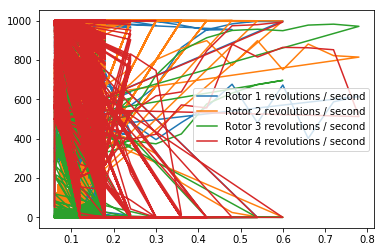

In [23]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

Finalmente, a célula abaixo mostra como as recompensas recebidas pelo agente evolui durante a simulação.

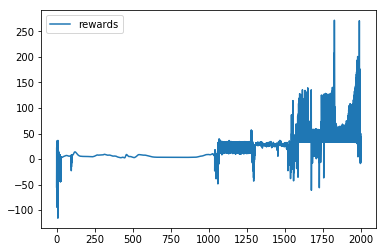

In [24]:
import matplotlib.pyplot as plt
## TODO: Plot the rewards.
plt.plot(results['episode'], results['rewards'], label='rewards')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

## Reflexões

** Questão 1 **: 
Descreva a tarefa que você especificou em `task.py`. Como você projetou a função de recompensa?

**Responda**:

1.1 - O objetivo do agente para cumprir essa tarefa é bem simples: atingir uma posição alvo especificada pela variável target_pos

A função de recompensa é a seguinte:

caso as variáveis self.sim.v e self.sim.angular_v não sejam None as variáveis MAX_speed e stable são calculadas

o objetivo do termo MAX_speed é fazer com que o agente voe o mais rápido possivel sem exceder o limite máximo de velocidade especificado pela variável Vel_max

MAX_speed=0

if self.sim.v is not None:

    MAX_speed=np.minimum(self.sim.v, self.Velocity_max).sum()
    MAX_speed=10*(MAX_speed) #Reschedule at maximum speed 
            
A função do termo stable é estabilizar o voo do agente, fazendo com que ele seja punido caso gire em algum dos eixos coordenados (x,y,z) fazendo com que a soma dos angulos de euler seja o menor possível  

stable=0

if self.sim.angular_v is not None:

     stable=0.0002*(np.power(self.sim.angular_v[0],2)+np.power(self.sim.angular_v[1],2)+np.power(self.sim.angular_v[2],2))
            
A função do termo target é fazer com que o agente se aproxime cada vez mais do alvo, sendo punido proporcionalmente a diferença entre a distância atual e a distância alvo do agente 
            
target = 0.0003*(abs(self.sim.pose[:3] - self.target_pos)).sum()
                              
reward = 5.+ MAX_speed - target - stable
       

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

** Questão 2 **: Discuta seu agente brevemente, usando as seguintes perguntas como um guia:

- Qual (is) algoritmo (s) de aprendizado você tentou? O que funcionou melhor para você?
- Qual foi a sua escolha final de hiperparâmetros (como $ \ alpha $, $ \ gamma $, $ \ epsilon $, etc.)?
- Qual arquitetura de rede neural você usou (se houver)? Especifique camadas, tamanhos, funções de ativação, etc.

**Responda**:

2.1 - O algoritmo de aprendizado escolhido para implementar o agente foi o Gradientes de Política Determinísticos Profundos, que na verdade é uma implementação do método ator-crítico, com algumas modificações

2.2 - Os hiperparâmetros foram escolhidos por experimentação através de tentativa e erro

2.3 - As redes neurais do ator e do crítico usam função de ativação elu, normalização de lotes, dropout, aumentei o número de neurônios em cada camada, tanto do ator como do crítico, de modo que a quantidade de neurônios foi o dobro da implementação sugerida

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

** Pergunta 3 **: Usando o gráfico de recompensas do episódio, discuta como o agente aprendeu ao longo do tempo.

- Foi uma tarefa fácil de aprender ou difícil?
- Houve uma curva de aprendizado gradual ou um momento de aha?
- Quão bom foi o desempenho final do agente? (por exemplo, recompensas médias nos últimos 10 episódios)

**Responda**:

3.1 - Foi uma tarefa muito difícil, a implementação foi fácil, o difícil foi ajustar os hiperparâmetros

3.1 - A curva de aprendizado foi gradual

3.3 - O desempenho do agente foi satisfatório, no início o desempenho do agente não apresentou nenhuma melhoria, mas depois melhorou com o decorer dos episódios, em um momento o desemponho do agente piorou, mas depois ele se recuperou e passou a aprender novamente, como mostra claramente o plot de recompemsas

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

** Pergunta 4 **: Resuma brevemente sua experiência de trabalho neste projeto. Você pode usar os seguintes prompts para ideias.

Qual foi a parte mais difícil do projeto? (por exemplo, começar, plotar, especificar a tarefa, etc.)
- Você achou alguma coisa interessante em como o quadricóptero ou seu agente se comportou?

**Responda**:

4.1 - A implementação do projeto em si foi fácil, as partes mais difíceis foram desenvolver o ambiente, principalemnte a função de recompensa do agente, e ajustar os hiperparâmetros do agente, o processo bastante tedioso e demorado pois foi por tentativa e erro, através de vários testes pude verificar e usar o que funciona melhor

4.2 - Em alguns momentos o comportamento do agente foi estranho, durante o processo de aprendizatem ele se movia de forma totalmente aleatória, principalmente com relação a rotação do agente nos eixos coordenados, isso devido ao comportamento exporatório do agente, na fase inicial, ele explora mais o ambiente, mas depois conforme ele foi aprendendo a tarefa no decorrer das épocas ele passou a se comportar de forma mais estável e previsível, pois ele passou a melhor forma de realizar a tarefa, para futuras melhorias acredito que a função de recompensa possa ser melhorada, principalmente com respeito as constantes, também acredito que os 
